In [98]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

ds_sc = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [63]:
ds_sc.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [64]:
#Ignoring first column and taking other column values
ds_sc = ds_sc.iloc[:, 1:]

In [65]:
ds_sc.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


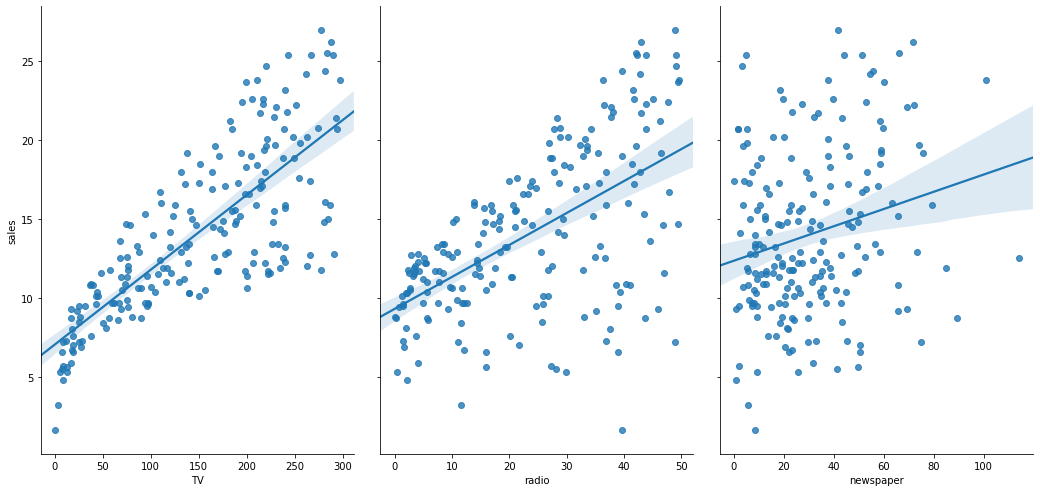

In [66]:
sns.pairplot(ds_sc, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')
plt.show()
#Strong relation between TV and sales when compared to other 2 methods

In [91]:
x_train, x_test, y_train, y_test = train_test_split(ds_sc.iloc[:,0:3], ds_sc.iloc[:,3], test_size = 0.5, random_state = 1)

In [92]:
lr = LinearRegression()
lr_model = lr.fit(x_train, y_train)

In [93]:
print("Train data score: ",lr_model.score(x_train, y_train))

Train data score:  0.15984461920283233


In [94]:
x_train.shape

(100, 3)

In [97]:
print("Test data score: ", lr_model.score(x_test, y_test))

Test data score:  0.11525651593793396


In [99]:
print("Mean square error: ", mean_squared_error(y_test, lr_model.predict(x_test)))

Mean square error:  430.96545562478207


In [100]:
print("R2 score: ", r2_score(y_test, lr_model.predict(x_test)))

R2 score:  0.11525651593793396


In [107]:
#After removing the New Paper in below data, R2 score improved a lot (from 0.115 to 0.006).  
#This value is less than default p value of 0.05
x_train, x_test, y_train, y_test = train_test_split(ds_sc.iloc[:,0:2], ds_sc.iloc[:,3], test_size = 0.5, random_state = 1)
lr = LinearRegression()
lr_model = lr.fit(x_train, y_train)
print("Train data score: ",lr_model.score(x_train, y_train))
print("Test data score: ", lr_model.score(x_test, y_test))
print("Mean square error: ", mean_squared_error(y_test, lr_model.predict(x_test)))
print("R2 score: ", r2_score(y_test, lr_model.predict(x_test)))

Train data score:  0.04299602280676462
Test data score:  0.006608768111887264
Mean square error:  483.88862147787336
R2 score:  0.006608768111887264
